In [49]:
ls

Data_Train.xlsx  sample_data/  Sample_submission.xlsx  Test_set.xlsx


In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
df_train=pd.read_excel("Data_Train.xlsx")
df_test=pd.read_excel("Test_set.xlsx")


In [51]:
print(df_train.head())

       Airline Date_of_Journey    Source  ... Total_Stops Additional_Info  Price
0       IndiGo      24/03/2019  Banglore  ...    non-stop         No info   3897
1    Air India       1/05/2019   Kolkata  ...     2 stops         No info   7662
2  Jet Airways       9/06/2019     Delhi  ...     2 stops         No info  13882
3       IndiGo      12/05/2019   Kolkata  ...      1 stop         No info   6218
4       IndiGo      01/03/2019  Banglore  ...      1 stop         No info  13302

[5 rows x 11 columns]


In [52]:
print(df_test.head())

             Airline Date_of_Journey  ... Total_Stops              Additional_Info
0        Jet Airways       6/06/2019  ...      1 stop                      No info
1             IndiGo      12/05/2019  ...      1 stop                      No info
2        Jet Airways      21/05/2019  ...      1 stop  In-flight meal not included
3  Multiple carriers      21/05/2019  ...      1 stop                      No info
4           Air Asia      24/06/2019  ...    non-stop                      No info

[5 rows x 10 columns]


In [53]:
#This will return how many rows have NaN values in each column
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [54]:
#Dropping these Nan Values
df_train.dropna(inplace=True)
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [55]:
#dropping duplicate rows if there are any
no_of_duplicates=df_train[df_train.duplicated()]
no_of_duplicates.shape
df_train.drop_duplicates(keep='first',inplace=True)

# **Data Cleaning**


In [56]:
print(df_train["Additional_Info"].value_counts())

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64


In [57]:
# replace repeating value in train set
df_train["Additional_Info"] = df_train["Additional_Info"].replace({'No Info': 'No info'})
print(df_train["Additional_Info"].value_counts())

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64


In [58]:
print(df_train["Destination"].value_counts())

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [59]:
#delhi new delhi are same so we replace
df_train=df_train.replace({"Delhi":"New Delhi"})
df_test=df_test.replace({"Delhi":"New Delhi"})
print(df_train["Destination"].value_counts())
print(df_test["Destination"].value_counts())

Cochin       4345
Banglore     2860
New Delhi    2179
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
Cochin       1145
Banglore      710
New Delhi     555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [60]:
#dont rerun this cell again and again else it will give error
df_train.Total_Stops.replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
df_test.Total_Stops.replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
df_train["Total_Stops"] = df_train["Total_Stops"].astype(int)
df_test["Total_Stops"] = df_test["Total_Stops"].astype(int)
df_train["Total_Stops"].dtype
print(df_train.Total_Stops)


0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10462, dtype: int64


In [61]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,New Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [62]:
print(df_train.shape)
print(df_test.shape)


(10462, 11)
(2671, 10)


In [63]:
#combining the test and train data frames for a while 
#so we dont have to data preprocessing again and again for both test and train
df_combine=df_train.append(df_test)
print(df_combine)

                Airline Date_of_Journey  ... Additional_Info    Price
0                IndiGo      24/03/2019  ...         No info   3897.0
1             Air India       1/05/2019  ...         No info   7662.0
2           Jet Airways       9/06/2019  ...         No info  13882.0
3                IndiGo      12/05/2019  ...         No info   6218.0
4                IndiGo      01/03/2019  ...         No info  13302.0
...                 ...             ...  ...             ...      ...
2666          Air India       6/06/2019  ...         No info      NaN
2667             IndiGo      27/03/2019  ...         No info      NaN
2668        Jet Airways       6/03/2019  ...         No info      NaN
2669          Air India       6/03/2019  ...         No info      NaN
2670  Multiple carriers      15/06/2019  ...         No info      NaN

[13133 rows x 11 columns]


In [64]:
#Essentially all it does is use integer division (//) to test whether the dayofweek attribute of the DatetimeIndex is less than 5. Normally this would return just a True or False, but tacking on the astype(float) at the end returns a 1 or 0 rather than a boolea
df_combine["Weekend"] = ((pd.to_datetime(df_combine["Date_of_Journey"], format = '%d/%m/%Y').dt.dayofweek) // 5 == 1).astype(int)
df_combine["Day"] = pd.to_datetime(df_combine["Date_of_Journey"], format = '%d/%m/%Y').dt.day_name()
df_combine["Date"] = pd.to_datetime(df_combine["Date_of_Journey"], format = '%d/%m/%Y').dt.day
df_combine["Month"] = pd.to_datetime(df_combine["Date_of_Journey"], format = '%d/%m/%Y').dt.month

In [65]:
#we can drop Date_of_Journey as it is redundant now
df_combine.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
print(df_combine.head())

       Airline     Source Destination  ...        Day Date Month
0       IndiGo   Banglore   New Delhi  ...     Sunday   24     3
1    Air India    Kolkata    Banglore  ...  Wednesday    1     5
2  Jet Airways  New Delhi      Cochin  ...     Sunday    9     6
3       IndiGo    Kolkata    Banglore  ...     Sunday   12     5
4       IndiGo   Banglore   New Delhi  ...     Friday    1     3

[5 rows x 14 columns]


In [66]:
df_combine.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekend,Day,Date,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,1,Sunday,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,0,Wednesday,1,5
2,Jet Airways,New Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,1,Sunday,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,1,Sunday,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,0,Friday,1,3


In [67]:
#BREAKING ROUTE

df_combine['Route_1'] = df_combine['Route'] .str.split('→ ').str[0]
df_combine['Route_2'] = df_combine['Route'] .str.split('→ ').str[1]
df_combine['Route_3'] = df_combine['Route'] .str.split('→ ').str[2]
df_combine['Route_4'] = df_combine['Route'] .str.split('→ ').str[3]
df_combine['Route_5'] = df_combine['Route'] .str.split('→ ').str[4]

df_combine['Route_1'].fillna("None",inplace = True)
df_combine['Route_2'].fillna("None",inplace = True)
df_combine['Route_3'].fillna("None",inplace = True)
df_combine['Route_4'].fillna("None",inplace = True)
df_combine['Route_5'].fillna("None",inplace = True)


In [68]:
#dropping route
df_combine.drop(labels = 'Route', axis = 1, inplace = True)

In [69]:

df_combine['Dep_Hour'] = pd.to_datetime(df_combine.Dep_Time).dt.hour
df_combine['Dep_Minutes'] = pd.to_datetime(df_combine.Dep_Time).dt.minute
df_combine.drop(labels = 'Dep_Time', axis = 1, inplace = True)
df_combine['Arr_Hour'] = pd.to_datetime(df_combine.Arrival_Time).dt.hour
df_combine['Arr_Minutes'] = pd.to_datetime(df_combine.Arrival_Time).dt.minute
df_combine.drop(labels = 'Arrival_Time', axis = 1, inplace = True)
#we can drop duration also because arrival and departure give us same info
#df_combine.drop(labels = 'Duration', axis = 1, inplace = True)
df_combine.head()


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Weekend,Day,Date,Month,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minutes,Arr_Hour,Arr_Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,1,Sunday,24,3,BLR,DEL,None,None,None,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,0,Wednesday,1,5,CCU,IXR,BBI,BLR,None,5,50,13,15
2,Jet Airways,New Delhi,Cochin,19h,2,No info,13882.0,1,Sunday,9,6,DEL,LKO,BOM,COK,None,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,1,Sunday,12,5,CCU,NAG,BLR,None,None,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,0,Friday,1,3,BLR,NAG,DEL,None,None,16,50,21,35


In [70]:
# cleaning duration column in datasets
duration = list(df_combine["Duration"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  
dur_seconds = []
for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)
df_combine["Duration_minutes"] = dur_minutes
df_combine.drop(["Duration"], axis=1, inplace = True)
df_combine.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Weekend,Day,Date,Month,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minutes,Arr_Hour,Arr_Minutes,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,1,Sunday,24,3,BLR,DEL,None,None,None,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,No info,7662.0,0,Wednesday,1,5,CCU,IXR,BBI,BLR,None,5,50,13,15,445
2,Jet Airways,New Delhi,Cochin,2,No info,13882.0,1,Sunday,9,6,DEL,LKO,BOM,COK,None,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,1,Sunday,12,5,CCU,NAG,BLR,None,None,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,0,Friday,1,3,BLR,NAG,DEL,None,None,16,50,21,35,285


In [71]:
df_combine.dtypes

Airline              object
Source               object
Destination          object
Total_Stops           int64
Additional_Info      object
Price               float64
Weekend               int64
Day                  object
Date                  int64
Month                 int64
Route_1              object
Route_2              object
Route_3              object
Route_4              object
Route_5              object
Dep_Hour              int64
Dep_Minutes           int64
Arr_Hour              int64
Arr_Minutes           int64
Duration_minutes      int64
dtype: object

In [72]:
# print(df_combine["Route_2"].value_counts())
# print(df_combine["Route_3"].value_counts())
# print(df_combine["Route_4"].value_counts())
# print(df_combine["Route_5"].value_counts())


#later on we can change this label encoder to one hot encoder to remove the problem of priority of label encoder
#normalizing the data by changing the categorial data into integer variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_combine["Additional_Info"] = le.fit_transform(df_combine["Additional_Info"])
df_combine["Airline"] = le.fit_transform(df_combine["Airline"])
df_combine["Destination"] = le.fit_transform(df_combine["Destination"])
df_combine["Source"] = le.fit_transform(df_combine["Source"])
df_combine['Route_1']= le.fit_transform(df_combine["Route_1"])
df_combine['Route_2']= le.fit_transform(df_combine["Route_2"])
df_combine['Route_3']= le.fit_transform(df_combine["Route_3"])
df_combine['Route_4']= le.fit_transform(df_combine["Route_4"])
df_combine['Route_5']= le.fit_transform(df_combine["Route_5"])
df_combine['Day'] = le.fit_transform(df_combine["Day"])

In [73]:
df_combine.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Weekend,Day,Date,Month,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minutes,Arr_Hour,Arr_Minutes,Duration_minutes
0,3,0,4,0,7,3897.0,1,3,24,3,0,13,24,12,4,22,20,1,10,170
1,1,2,0,2,7,7662.0,0,6,1,5,2,25,1,3,4,5,50,13,15,445
2,4,4,1,2,7,13882.0,1,3,9,6,3,32,4,5,4,9,25,4,25,1140
3,3,2,0,1,7,6218.0,1,3,12,5,2,34,3,12,4,18,5,23,30,325
4,3,0,4,1,7,13302.0,0,0,1,3,0,34,8,12,4,16,50,21,35,285


PREPARING FOR MODEL

In [74]:
df_train = df_combine[0:10462]
df_test = df_combine[10462:]
df_test = df_test.drop(['Price'], axis =1)
x_train=df_train.drop(["Price"], axis =1)
y_train=np.log1p(df_train.Price)
print(x_train.shape)
print(y_train.shape)

(10462, 19)
(10462,)


In [75]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_log_error
# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred,X_test, model):
 print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [76]:
# we have created a function to generate linear regression model
# which can then be called again after feature selection or other steps
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
def LinearRegressionModel(X,y):
 X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
 regressor = LinearRegression()  
 regressor.fit(X_train, y_train)
 y_pred = regressor.predict(X_test)
 print(print_accuracy_report(y_test, y_pred, X_test, regressor))
 return regressor
linearModel = LinearRegressionModel(x_train,y_train)

R Squared(Accuracy) 0.6061118288899254
Mean Absolute Error: 0.2584467151754098
Mean Squared Error: 0.10379663304204617
Root Mean Squared Error: 0.32217484855594514
Root Mean Squared Log Error 0.03236649045818157
None


In [77]:
#similarly define a function for random forest regressor
from sklearn.ensemble import RandomForestRegressor
def RandomForestRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
randomForestModel = RandomForestRegressorModel(x_train,y_train)

R Squared(Accuracy) 0.9349290726063062
Mean Absolute Error: 0.07181771339273088
Mean Squared Error: 0.017147362291571273
Root Mean Squared Error: 0.13094793733225152
Root Mean Squared Log Error 0.013063213290358757
None


In [78]:
# get feature importances from a model
import matplotlib.pyplot as plt
def plotFeatureImportances(model):
    #first print all features importances in descending order
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    # Next plot feature importances to get idea about where the curve breaks
    # in the graph i.e. select top appropriate features
    features = x_train.columns.tolist()
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

                  importance
Duration_minutes    0.600584
Airline             0.096954
Date                0.046357
Additional_Info     0.045838
Month               0.044986
Total_Stops         0.034775
Route_2             0.026620
Day                 0.015808
Dep_Minutes         0.015470
Dep_Hour            0.015409
Arr_Hour            0.015090
Arr_Minutes         0.013700
Route_3             0.007179
Destination         0.005524
Route_1             0.005311
Weekend             0.005261
Source              0.003106
Route_4             0.001990
Route_5             0.000039


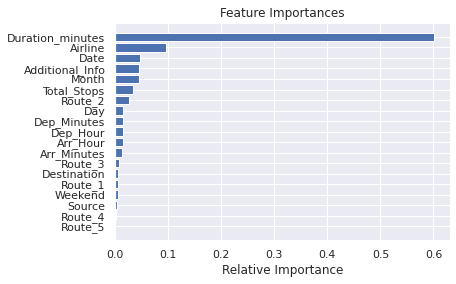

In [79]:
plotFeatureImportances(randomForestModel)


In [80]:
# Since we need to send our final predictions made on test dataset in excel format
# the below function can be used to generate excel file for a given model which can then be submitted
# to the hackathon
def generateFinalPredictionFile(model):
    y_test_pred = model.predict(X_to_predict.values)
    y_test_pred_exp = np.exp(y_test_pred)
    print(y_test_pred_exp)
    pd.DataFrame(y_test_pred_exp, columns = ['Price']).to_excel("Final_Pred.xlsx", index = False)

R Squared(Accuracy) 0.9377804834474484
Mean Absolute Error: 0.06704609236368775
Mean Squared Error: 0.016395964137379336
Root Mean Squared Error: 0.12804672638290812
Root Mean Squared Log Error 0.012767668827902534
None
                  importance
Total_Stops         0.247683
Route_3             0.200817
Airline             0.104176
Duration_minutes    0.102293
Route_2             0.058832
Date                0.052614
Month               0.046059
Additional_Info     0.035803
Route_4             0.020177
Arr_Hour            0.018869
Dep_Hour            0.016709
Dep_Minutes         0.016320
Destination         0.015996
Day                 0.015230
Route_1             0.014274
Arr_Minutes         0.013150
Source              0.010727
Weekend             0.010128
Route_5             0.000144


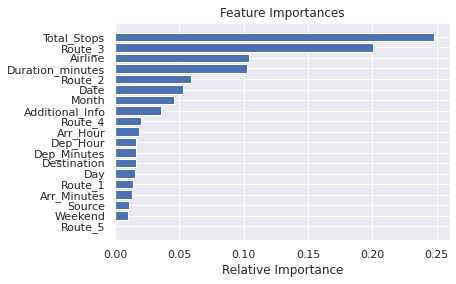

In [81]:
# select features using extratreesclassifier
from sklearn.ensemble import ExtraTreesRegressor
def ExtraTreesRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = ExtraTreesRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
extraTreeRegressorModel = ExtraTreesRegressorModel(x_train,y_train)
plotFeatureImportances(extraTreeRegressorModel)

In [82]:
# select features using XGboost
from xgboost import XGBRegressor
def XGBRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =42, nthread = -1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
xgbRegressorModel = XGBRegressorModel(x_train,y_train)

R Squared(Accuracy) 0.921421447668181
Mean Absolute Error: 0.10132437318966415
Mean Squared Error: 0.02070686494183075
Root Mean Squared Error: 0.14389880104375696
Root Mean Squared Log Error 0.014420614248796482
None


                  importance
Total_Stops         0.448369
Route_3             0.105457
Duration_minutes    0.100771
Airline             0.057461
Additional_Info     0.043891
Destination         0.041995
Route_4             0.035657
Month               0.031079
Date                0.021589
Day                 0.021127
Route_2             0.019191
Route_1             0.012867
Weekend             0.012385
Source              0.010475
Dep_Hour            0.008027
Route_5             0.007827
Arr_Hour            0.007557
Dep_Minutes         0.007184
Arr_Minutes         0.007091


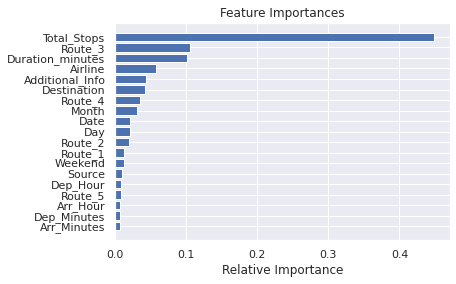

74478279728974892742789273984729874987489274


In [83]:
plotFeatureImportances(xgbRegressorModel)
print("74478279728974892742789273984729874987489274")

In [84]:
# #bad model..explain????
# from sklearn.svm import SVR
# def SVRModel(X,y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
#     regressor=SVR(kernel='linear',degree=1)
#     regressor.fit(X_train, y_train)
#     y_pred = regressor.predict(X_test)
#     print(print_accuracy_report(y_test, y_pred, X_test, regressor))
#     return regressor
# svRegressorModel = SVRModel(x_train,y_train)

Graph of various features

count    10462.000000
mean      9026.790289
std       4624.849541
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12344.750000
max      79512.000000
Name: Price, dtype: float64
Skewness: 1.857490
Kurtosis: 13.527896


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


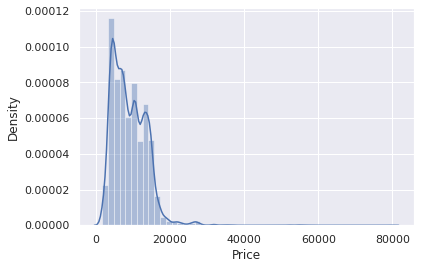

In [85]:
#descriptive statistics summary
import seaborn as sns
print(df_train['Price'].describe())
#skewness and kurtosis
print("Skewness: %f" % df_train['Price'].skew())
print("Kurtosis: %f" % df_train['Price'].kurt())
sns.distplot(df_train['Price'])
#the displot is showing density probability plot in regards with price
#so area under the curve adds up to one.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


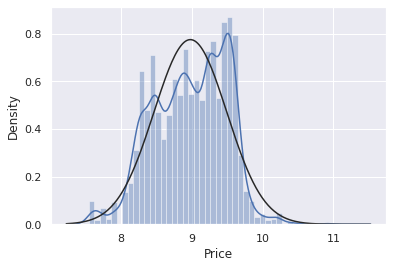

In [86]:
#Due to high positive screwness we will do log tansformation 
from scipy.stats import norm, skew 
sns.distplot(np.log1p(df_train["Price"]) , fit=norm);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


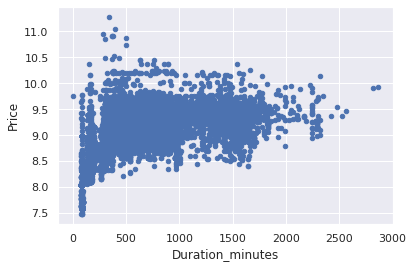

In [87]:
#scatter plot Duration_minutes/Price
var = 'Duration_minutes'
data = pd.concat([y_train, x_train[var]], axis=1)
data.plot.scatter(x=var, y='Price');

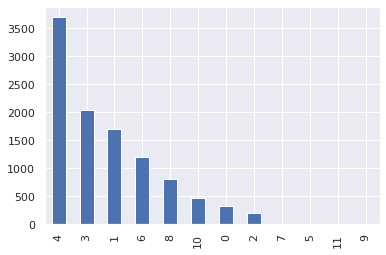

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
carrier_count = x_train["Airline"].value_counts()
carrier_count.plot(kind='bar')

Text(0.5, 1.0, 'Total stops')

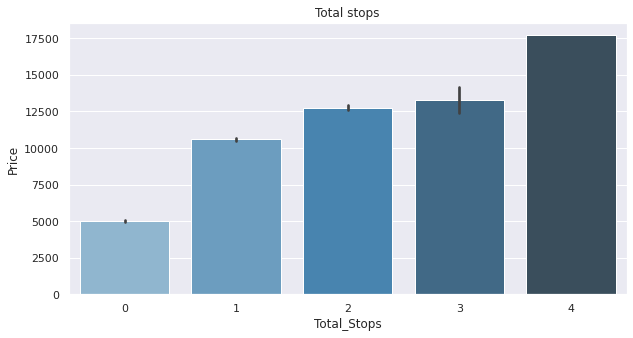

In [89]:
#Variation of price against total number of stops:
sns.set(style="darkgrid")
figure(figsize=(10,5)) 
sns.barplot(x="Total_Stops", y="Price", data=df_train, palette="Blues_d")
plt.title('Total stops')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]), <a list of 9 Text major ticklabel objects>)

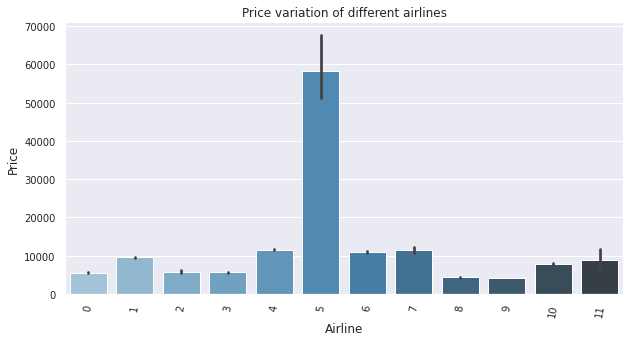

In [90]:
#Variation of price with different airline
sns.set(style="darkgrid")
figure(figsize=(10,5)) 
sns.barplot(x="Airline", y="Price", data=df_train, palette="Blues_d")
plt.title('Price variation of different airlines')
plt.xticks(fontsize=10, rotation=80)
plt.yticks(fontsize=10)

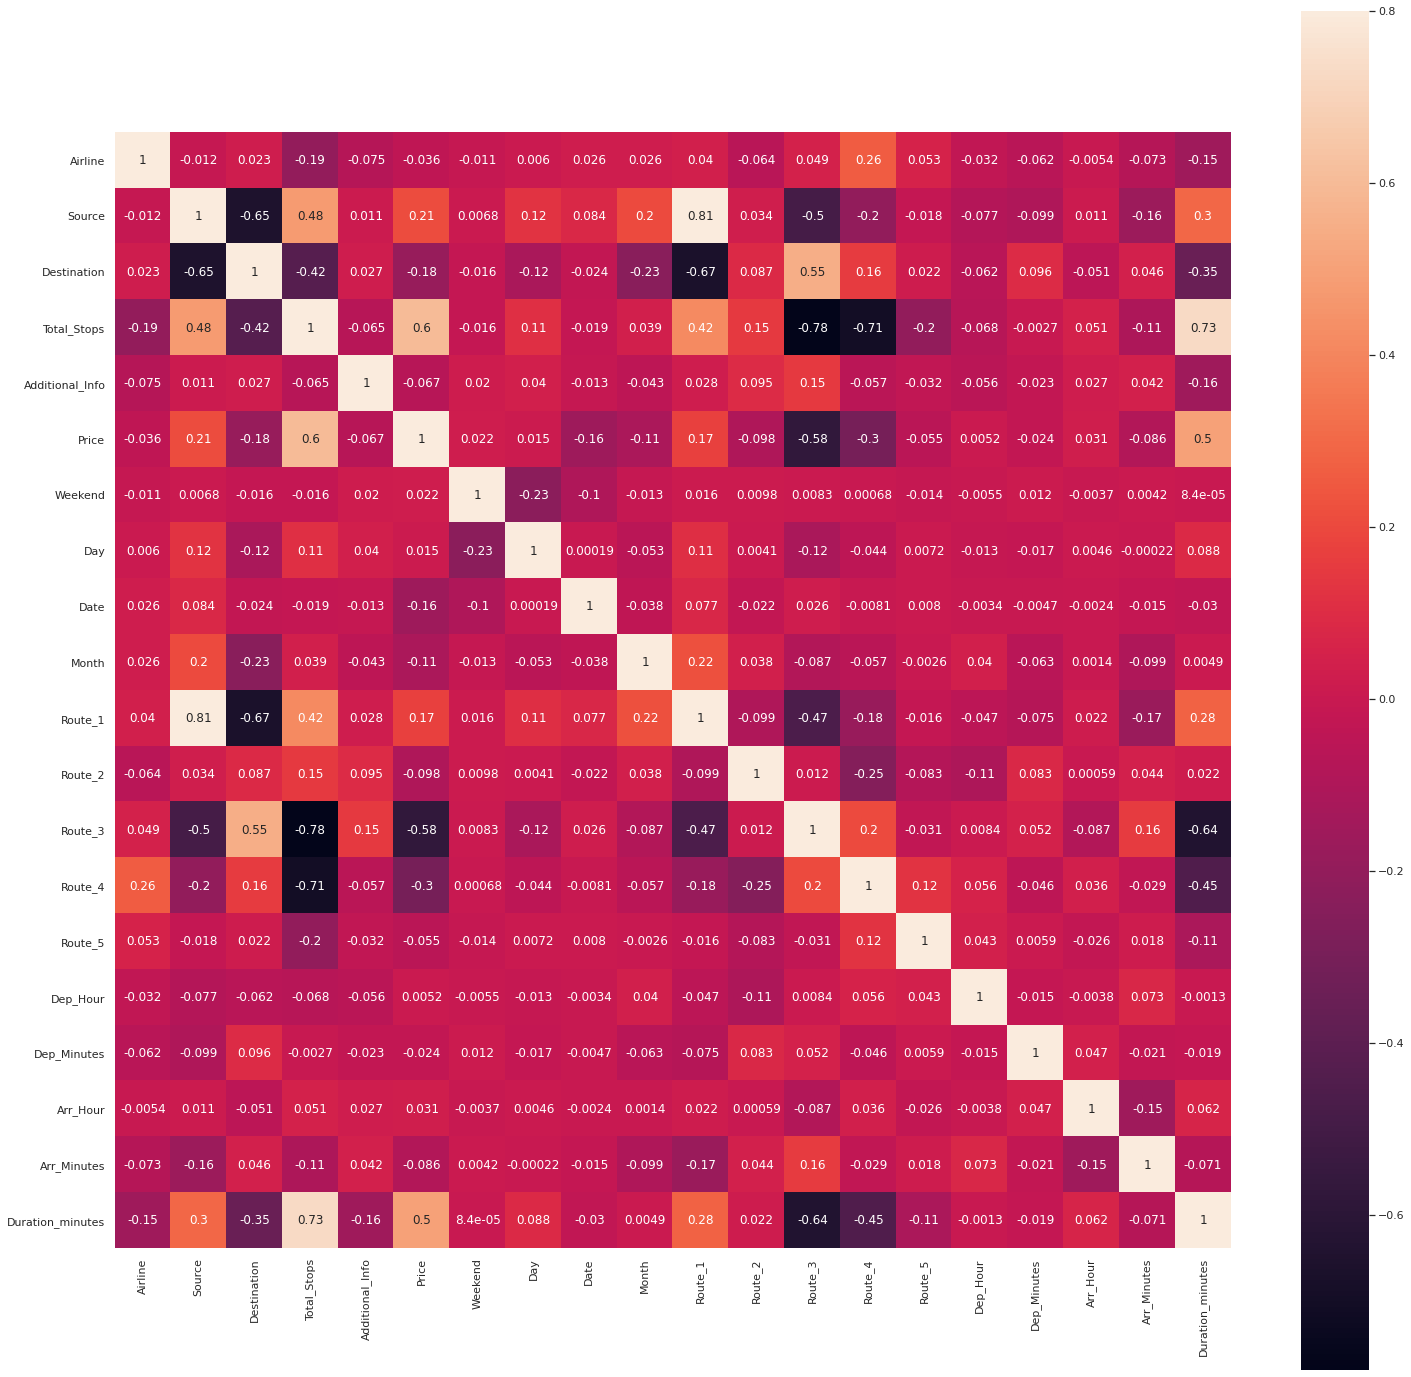

In [91]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);


Source:- https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [92]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#Validation function
n_folds = 5
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x_train,y_train,random_state=42, test_size=0.3)
   
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model,X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
        # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
stacked_averaged_models = StackingAveragedModels(base_models = (extraTreeRegressorModel, randomForestModel, xgbRegressorModel),
                                                 meta_model = linearModel)

score = rmsle_cv(stacked_averaged_models)

In [93]:
stacked_averaged_models.fit(X_train, y_train)
y_pred = stacked_averaged_models.predict(X_test)
print(print_accuracy_report(y_test, y_pred, X_test, stacked_averaged_models))

R Squared(Accuracy) 0.9421421123987445
Mean Absolute Error: 0.07397079815464862
Mean Squared Error: 0.015246596289019318
Root Mean Squared Error: 0.1234771083602921
Root Mean Squared Log Error 0.01233480980983593
None
